<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_simple_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip

In [ ]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [ ]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [ ]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [ ]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [ ]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [ ]:
!wget https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.1.zip -O master.zip

--2024-03-11 05:48:42--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-03-11 05:48:42--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [              <=>   ]  74.26M  18.8MB/s    in 3.9s    

2024-03-11 05:48:46 (18.8 MB/s) - ‘master.zip’ saved [77870007]



In [ ]:
!unzip -o master.zip -d master

Archive:  master.zip
3e93df015da9f10c8ff1bab8a45a265f3ce70b71
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [ ]:
!mv master/trado_samples-0.1/src/modules_gislr .

In [ ]:
!rm -rf master master.zip gislr_top10.zip

In [ ]:
!ls

dataset_top10  drive  modules_gislr  sample_data


# 2. Load library

In [ ]:
import copy
import json
import math
import os
import sys
from functools import partial
from pathlib import Path
from typing import (
    Any,
    Dict
)

# Third party's modules
import matplotlib.pyplot as plt

import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    GPoolRecognitionHead,
    RNNEncoder
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)

# 3. Implement RNN ISLR model

### Toy attention layer

In [ ]:
def calc_attention(inputs, linear, attention_type, post_scale):
    if attention_type == "sigmoid":
        scale = torch.nn.Sigmoid()
    else:
        scale = torch.nn.Softmax(dim=1)

    attw = linear(inputs)
    attw = scale(attw).clone()

    if post_scale:
        tlength = inputs.shape[1]
        coef = tlength / attw.sum(dim=1, keepdims=True)
        attw = attw * coef
    attw = attw.detach().cpu().numpy()
    attw = attw.reshape([-1])
    return attw

In [ ]:
def plot_attention(params):
    attws = params["attws"]
    names = params["names"]

    xs = np.arange(1, attws[0].shape[0] + 1)
    ymax = max([attw.max() for attw in attws])

    for attw, name in zip(attws, names):
        plt.plot(xs, attw, marker=".", label=name)
        plt.xlabel("Frames")
        plt.ylabel("Attention weight")
        plt.ylim([0.0, ymax])
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=len(names))
    plt.show()

Sigmoid_WOPS
[0.35091656 0.32962146 0.3631432  0.34693557 0.4110619  0.38649064
 0.4181261  0.3945444  0.38976938 0.3776075 ]
Sigmoid_WPS
[0.9312537  0.87474126 0.9637004  0.92068905 1.090866   1.0256593
 1.1096127  1.0470321  1.0343603  1.0020854 ]
Softmax_WOPS
[0.08895836 0.08090564 0.09382521 0.08741304 0.11484735 0.10365763
 0.11823928 0.10722524 0.10509865 0.09982968]
Softmax_WPS
[0.8895834  0.8090562  0.93825185 0.87413025 1.1484733  1.0365762
 1.1823926  1.0722522  1.0509863  0.9982966 ]


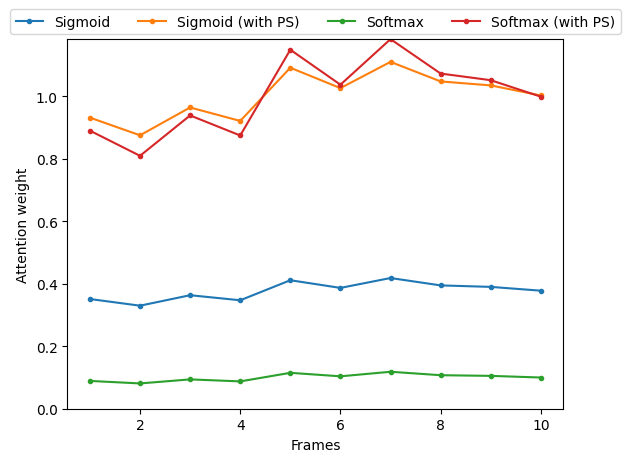

In [ ]:
inputs = torch.rand([1, 10, 5], dtype=torch.float32)
linear = torch.nn.Linear(inputs.shape[-1], 1)

attw_sig_wops = calc_attention(copy.deepcopy(inputs), linear, "sigmoid", False)
attw_sig_wps = calc_attention(copy.deepcopy(inputs), linear, "sigmoid", True)
attw_smax_wops = calc_attention(copy.deepcopy(inputs), linear, "softmax", False)
attw_smax_wps = calc_attention(copy.deepcopy(inputs), linear, "softmax", True)

print("=" * 80)
print("Sigmoid_WOPS")
print(attw_sig_wops)

print("=" * 80)
print("Sigmoid_WPS")
print(attw_sig_wps)

print("=" * 80)
print("Softmax_WOPS")
print(attw_smax_wops)

print("=" * 80)
print("Softmax_WPS")
print(attw_smax_wps)

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

## ISLR model

In [ ]:
class TemporalAttention(nn.Module):
    def __init__(self,
                 in_channels,
                 attention_type,
                 post_scale):
        super().__init__()
        assert attention_type in ["sigmoid", "softmax"]
        self.linear = nn.Linear(in_channels, 1)
        self.attention_type = attention_type

        if attention_type == "sigmoid":
            self.scale_layer = nn.Sigmoid()
        elif attention_type == "softmax":
            self.scale_layer = nn.Softmax(dim=1)

        self.neg_inf = None
        self.post_scale = post_scale

    def calc_attw(self, attw, mask):
        # Initialize masking value.
        if self.neg_inf is None:
            self.neg_inf = float(np.finfo(
                torch.tensor(0, dtype=attw.dtype).numpy().dtype).min)
        if mask is not None:
            attw = attw.masked_fill_(mask[:, :, None] == 0, self.neg_inf)
        attw = self.scale_layer(attw)
        if self.post_scale:
            if mask is None:
                tlength = torch.tensor(attw.shape[1], dtype=attw.dtype, device=attw.device)
                tlength = tlength.reshape([1, 1, 1])
            else:
                tlength = mask.sum(dim=1)
                tlength = tlength.reshape([-1, 1, 1])
            scale = tlength / attw.sum(dim=1, keepdims=True)
            attw = attw * scale
        return attw

    def forward(self, feature, mask=None):
        # `[N, T, C]`
        attw = self.linear(feature)
        attw = self.calc_attw(attw, mask)
        feature = attw * feature
        return feature, attw

In [ ]:
class Identity(nn.Module):
    """Place holder layer to return identity vector.
    """
    # This design is on purpose.
    # pylint: disable=unused-argument
    def __init__(self, *args, **kwargs):
        super().__init__()

    def forward(self, feature, *args, **kwargs):
        """Perform forward computation.
        """
        return feature

In [ ]:
class RNNISLR(nn.Module):
    def __init__(self,
                 in_channels,
                 hidden_channels,
                 out_channels,
                 rnn_type="lstm",
                 rnn_num_layers=1,
                 rnn_activation="tanh",
                 rnn_bidir=False,
                 rnn_dropout=0.1,
                 masking_type="both",
                 attention_type="none",
                 attention_post_scale=False):
        super().__init__()
        assert rnn_type in ["srnn", "lstm", "gru"]
        assert masking_type in ["none", "rnn", "head", "both"]
        assert attention_type in ["none", "sigmoid", "softmax"]

        self.linear = nn.Linear(in_channels, hidden_channels)
        self.activation = nn.ReLU()

        apply_mask = True if masking_type in ["rnn", "both"] else False
        self.rnn = RNNEncoder(
            in_channels=hidden_channels,
            out_channels=hidden_channels,
            rnn_type=rnn_type,
            num_layers=rnn_num_layers,
            activation=rnn_activation,
            bidir=rnn_bidir,
            dropout=rnn_dropout,
            apply_mask=apply_mask)

        if attention_type != "none":
            if rnn_bidir:
                self.att = TemporalAttention(hidden_channels * 2, attention_type,
                                             post_scale=attention_post_scale)
            else:
                self.att = TemporalAttention(hidden_channels, attention_type,
                                             post_scale=attention_post_scale)
        else:
            self.att = Identity()
        self.attw = None

        if rnn_bidir:
            self.head = GPoolRecognitionHead(hidden_channels * 2, out_channels)
        else:
            self.head = GPoolRecognitionHead(hidden_channels, out_channels)

        self.masking_type = masking_type

    def forward(self, feature, feature_pad_mask=None):
        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = feature.shape
        feature = feature.permute([0, 2, 1, 3])
        feature = feature.reshape(N, T, -1)

        feature = self.linear(feature)
        feature = self.activation(feature)

        hidden_seqs, last_hstate = self.rnn(feature, feature_pad_mask)[:2]

        # Apply attention.
        hidden_seqs = self.att(hidden_seqs, feature_pad_mask)
        if isinstance(hidden_seqs, (tuple, list)):
            hidden_seqs, self.attw = hidden_seqs[0], hidden_seqs[1]

        # `[N, T, C'] -> [N, C', T]`
        feature = hidden_seqs.permute(0, 2, 1)

        if feature_pad_mask is not None and self.masking_type in ["head", "both"]:
            logit = self.head(feature, feature_pad_mask)
        else:
            logit = self.head(feature)
        return logit

## Sanity check

In [ ]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/28656.hdf5')]


In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [ ]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

pre_transforms = Compose([trans_select_feature,
                          trans_repnan,
                          trans_norm])
transforms = Compose([ToTensor()])

In [ ]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]

    print(feature_origin.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 88, 130])


In [ ]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
hidden_channels = 64
out_channels = VOCAB
rnn_type="srnn"
rnn_num_layers=2
rnn_bidir=True
rnn_dropout=0.1
masking_type="both"
attention_type = "sigmoid"
attention_post_scale = True

model = RNNISLR(in_channels=in_channels,
                hidden_channels=hidden_channels,
                out_channels=out_channels,
                rnn_type=rnn_type,
                rnn_num_layers=rnn_num_layers,
                rnn_bidir=rnn_bidir,
                masking_type=masking_type,
                attention_type=attention_type,
                attention_post_scale=attention_post_scale)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)
attw = model.attw.detach().cpu().numpy()
print(attw.max())
print(attw.sum())

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): TemporalAttention(
    (linear): Linear(in_features=128, out_features=1, bias=True)
    (scale_layer): Sigmoid()
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)
torch.Size([2, 10])
1.0563259
176.0


# 4. Train and evaluation

## 4.1 Set common parameters.

In [ ]:
# Set common parameters.
batch_size = 256 if torch.cuda.is_available() else 32
load_into_ram = True
test_pid = 16069
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cpu for computation.


In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms,
    transforms=transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 4.2 Run training process

### Default settings

In [ ]:
rnn_type="srnn"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"
attention_type = "none"
attention_post_scale = False

model_default = RNNISLR(in_channels=in_channels,
                    hidden_channels=hidden_channels,
                    out_channels=out_channels,
                    rnn_type=rnn_type,
                    rnn_num_layers=rnn_num_layers,
                    rnn_bidir=rnn_bidir,
                    masking_type=masking_type,
                    attention_type=attention_type,
                    attention_post_scale=attention_post_scale)
print(model_default)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_default.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): Identity()
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model_default.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_default, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_default, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_default, device)
        test_accs.append(acc)
train_losses_default = np.array(train_losses)
val_losses_default = np.array(val_losses)
test_accs_default = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_default.min()} at {np.argmin(val_losses_default)+1} epoch.")
print(f"Maximum accuracy:{test_accs_default.max()} at {np.argmax(test_accs_default)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.433032 [    0/ 3881]
loss:1.738605 [ 3200/ 3881]
Done. Time:33.71714749399999
Training performance: 
 Avg loss:1.871103

Start validation.
Done. Time:0.8706382180000105
Validation performance: 
 Avg loss:1.700689

Start evaluation.
Done. Time:2.578130967999982
Test performance: 
 Accuracy:45.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.627457 [    0/ 3881]
loss:0.953291 [ 3200/ 3881]
Done. Time:34.55060618199997
Training performance: 
 Avg loss:1.171075

Start validation.
Done. Time:0.5557674110000335
Validation performance: 
 Avg loss:1.426884

Start evaluation.
Done. Time:2.1351512130000287
Test performance: 
 Accuracy:58.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:0.602084 [    0/ 3881]
loss:0.618084 [ 3200/ 3881]
Done. 

### Apply sigmoid attention without post scale

In [ ]:
rnn_type="srnn"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"
attention_type = "sigmoid"
attention_post_scale = False

model_sig_wops = RNNISLR(in_channels=in_channels,
                    hidden_channels=hidden_channels,
                    out_channels=out_channels,
                    rnn_type=rnn_type,
                    rnn_num_layers=rnn_num_layers,
                    rnn_bidir=rnn_bidir,
                    masking_type=masking_type,
                    attention_type=attention_type,
                    attention_post_scale=attention_post_scale)
print(model_sig_wops)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_sig_wops.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): TemporalAttention(
    (linear): Linear(in_features=128, out_features=1, bias=True)
    (scale_layer): Sigmoid()
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model_sig_wops.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_sig_wops, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_sig_wops, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_sig_wops, device)
        test_accs.append(acc)
train_losses_sigmoid_attention_wo_post_scale = np.array(train_losses)
val_losses_sigmoid_attention_wo_post_scale = np.array(val_losses)
test_accs_sigmoid_attention_wo_post_scale = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_sigmoid_attention_wo_post_scale.min()} at {np.argmin(val_losses_sigmoid_attention_wo_post_scale)+1} epoch.")
print(f"Maximum accuracy:{test_accs_sigmoid_attention_wo_post_scale.max()} at {np.argmax(test_accs_sigmoid_attention_wo_post_scale)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.288794 [    0/ 3881]
loss:1.384529 [ 3200/ 3881]
Done. Time:39.05717845400022
Training performance: 
 Avg loss:1.898315

Start validation.
Done. Time:0.9837092960001428
Validation performance: 
 Avg loss:1.894879

Start evaluation.
Done. Time:2.288077999000052
Test performance: 
 Accuracy:30.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.238005 [    0/ 3881]
loss:1.397705 [ 3200/ 3881]
Done. Time:36.56132813699969
Training performance: 
 Avg loss:1.153876

Start validation.
Done. Time:0.9218339939998259
Validation performance: 
 Avg loss:1.304115

Start evaluation.
Done. Time:2.600773676999779
Test performance: 
 Accuracy:47.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.167115 [    0/ 3881]
loss:0.885101 [ 3200/ 3881]
Done. T

### Apply sigmoid attention with post scale

In [ ]:
rnn_type="srnn"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"
attention_type = "sigmoid"
attention_post_scale = True

model_sig_wps = RNNISLR(in_channels=in_channels,
                    hidden_channels=hidden_channels,
                    out_channels=out_channels,
                    rnn_type=rnn_type,
                    rnn_num_layers=rnn_num_layers,
                    rnn_bidir=rnn_bidir,
                    masking_type=masking_type,
                    attention_type=attention_type,
                    attention_post_scale=attention_post_scale)
print(model_sig_wps)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_sig_wps.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): TemporalAttention(
    (linear): Linear(in_features=128, out_features=1, bias=True)
    (scale_layer): Sigmoid()
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model_sig_wps.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_sig_wps, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_sig_wps, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_sig_wps, device)
        test_accs.append(acc)
train_losses_sigmoid_attention_w_post_scale = np.array(train_losses)
val_losses_sigmoid_attention_w_post_scale = np.array(val_losses)
test_accs_sigmoid_attention_w_post_scale = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_sigmoid_attention_w_post_scale.min()} at {np.argmin(val_losses_sigmoid_attention_w_post_scale)+1} epoch.")
print(f"Maximum accuracy:{test_accs_sigmoid_attention_w_post_scale.max()} at {np.argmax(test_accs_sigmoid_attention_w_post_scale)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.526096 [    0/ 3881]
loss:1.517061 [ 3200/ 3881]
Done. Time:32.390807445000064
Training performance: 
 Avg loss:1.834177

Start validation.
Done. Time:0.6743470589999561
Validation performance: 
 Avg loss:1.641145

Start evaluation.
Done. Time:1.7362118679998275
Test performance: 
 Accuracy:37.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.125433 [    0/ 3881]
loss:0.934659 [ 3200/ 3881]
Done. Time:31.02309600999979
Training performance: 
 Avg loss:1.133585

Start validation.
Done. Time:0.5975831270002345
Validation performance: 
 Avg loss:1.333203

Start evaluation.
Done. Time:1.7353321030000188
Test performance: 
 Accuracy:50.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.171240 [    0/ 3881]
loss:0.835436 [ 3200/ 3881]
Done

### Apply softmax attention without post scale

In [ ]:
rnn_type="srnn"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"
attention_type = "softmax"
attention_post_scale = False

model_smax_wops = RNNISLR(in_channels=in_channels,
                      hidden_channels=hidden_channels,
                      out_channels=out_channels,
                      rnn_type=rnn_type,
                      rnn_num_layers=rnn_num_layers,
                      rnn_bidir=rnn_bidir,
                      masking_type=masking_type,
                      attention_type=attention_type,
                      attention_post_scale=attention_post_scale)
print(model_smax_wops)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_smax_wops.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): TemporalAttention(
    (linear): Linear(in_features=128, out_features=1, bias=True)
    (scale_layer): Softmax(dim=1)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model_smax_wops.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_smax_wops, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_smax_wops, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_smax_wops, device)
        test_accs.append(acc)
train_losses_softmax_attention_wo_post_scale = np.array(train_losses)
val_losses_softmax_attention_wo_post_scale = np.array(val_losses)
test_accs_softmax_attention_wo_post_scale = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_softmax_attention_wo_post_scale.min()} at {np.argmin(val_losses_softmax_attention_wo_post_scale)+1} epoch.")
print(f"Maximum accuracy:{test_accs_softmax_attention_wo_post_scale.max()} at {np.argmax(test_accs_softmax_attention_wo_post_scale)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.319320 [    0/ 3881]
loss:2.146199 [ 3200/ 3881]
Done. Time:34.22632737599997
Training performance: 
 Avg loss:2.204602

Start validation.
Done. Time:0.6449605189991416
Validation performance: 
 Avg loss:2.190227

Start evaluation.
Done. Time:1.7884910490001857
Test performance: 
 Accuracy:22.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.060947 [    0/ 3881]
loss:1.997785 [ 3200/ 3881]
Done. Time:32.680287526999564
Training performance: 
 Avg loss:2.030569

Start validation.
Done. Time:0.6134443429991734
Validation performance: 
 Avg loss:2.169724

Start evaluation.
Done. Time:1.838494826999522
Test performance: 
 Accuracy:32.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.940707 [    0/ 3881]
loss:1.877996 [ 3200/ 3881]
Done.

### Apply softmax attention with post scale

In [ ]:
rnn_type="srnn"
rnn_num_layers = 2
rnn_bidir = True
masking_type = "both"
attention_type = "softmax"
attention_post_scale = True

model_smax_wps = RNNISLR(in_channels=in_channels,
                     hidden_channels=hidden_channels,
                     out_channels=out_channels,
                     rnn_type=rnn_type,
                     rnn_num_layers=rnn_num_layers,
                     rnn_bidir=rnn_bidir,
                     masking_type=masking_type,
                     attention_type=attention_type,
                     attention_post_scale=attention_post_scale)
print(model_smax_wps)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_smax_wps.parameters(), lr=lr)

RNNISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (rnn): RNNEncoder(
    (rnn): RNN(64, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  )
  (att): TemporalAttention(
    (linear): Linear(in_features=128, out_features=1, bias=True)
    (scale_layer): Softmax(dim=1)
  )
  (head): GPoolRecognitionHead(
    (head): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Train, validation, and evaluation.
model_smax_wps.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_smax_wps, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_smax_wps, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_smax_wps, device)
        test_accs.append(acc)
train_losses_softmax_attention_w_post_scale = np.array(train_losses)
val_losses_softmax_attention_w_post_scale = np.array(val_losses)
test_accs_softmax_attention_w_post_scale = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_softmax_attention_w_post_scale.min()} at {np.argmin(val_losses_softmax_attention_w_post_scale)+1} epoch.")
print(f"Maximum accuracy:{test_accs_softmax_attention_w_post_scale.max()} at {np.argmax(test_accs_softmax_attention_w_post_scale)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:2.390898 [    0/ 3881]
loss:1.694646 [ 3200/ 3881]
Done. Time:33.552081439000176
Training performance: 
 Avg loss:1.876016

Start validation.
Done. Time:0.8202391300001182
Validation performance: 
 Avg loss:1.841463

Start evaluation.
Done. Time:2.5768029690007097
Test performance: 
 Accuracy:40.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.467137 [    0/ 3881]
loss:0.950208 [ 3200/ 3881]
Done. Time:31.97183317500003
Training performance: 
 Avg loss:1.123240

Start validation.
Done. Time:0.6275411130000066
Validation performance: 
 Avg loss:1.336263

Start evaluation.
Done. Time:1.744059601999652
Test performance: 
 Accuracy:53.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:0.945735 [    0/ 3881]
loss:1.033110 [ 3200/ 3881]
Done.

### Plort result

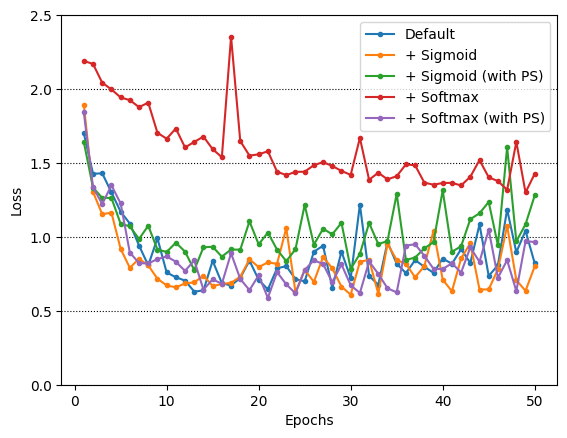

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_default)+1)
plt.plot(xs, val_losses_default, label="Default", marker=".")
plt.plot(xs, val_losses_sigmoid_attention_wo_post_scale, label="+ Sigmoid", marker=".")
plt.plot(xs, val_losses_sigmoid_attention_w_post_scale, label="+ Sigmoid (with PS)", marker=".")
plt.plot(xs, val_losses_softmax_attention_wo_post_scale, label="+ Softmax", marker=".")
plt.plot(xs, val_losses_softmax_attention_w_post_scale, label="+ Softmax (with PS)", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

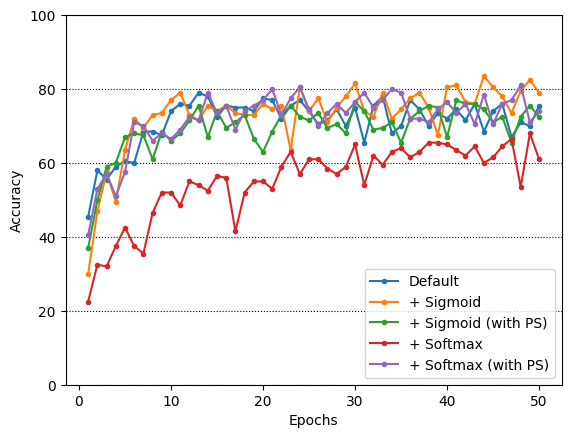

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_default)+1)
plt.plot(xs, test_accs_default, label="Default", marker=".")
plt.plot(xs, test_accs_sigmoid_attention_wo_post_scale, label="+ Sigmoid", marker=".")
plt.plot(xs, test_accs_sigmoid_attention_w_post_scale, label="+ Sigmoid (with PS)", marker=".")
plt.plot(xs, test_accs_softmax_attention_wo_post_scale, label="+ Softmax", marker=".")
plt.plot(xs, test_accs_softmax_attention_w_post_scale, label="+ Softmax (with PS)", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()

### Plot attention

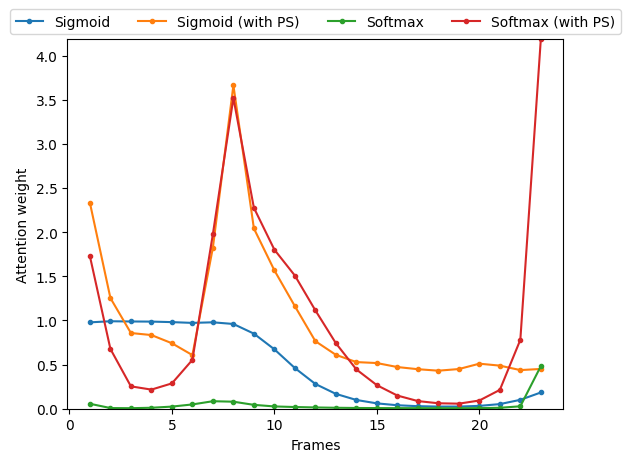

In [ ]:
test_iter = iter(test_dataloader)
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

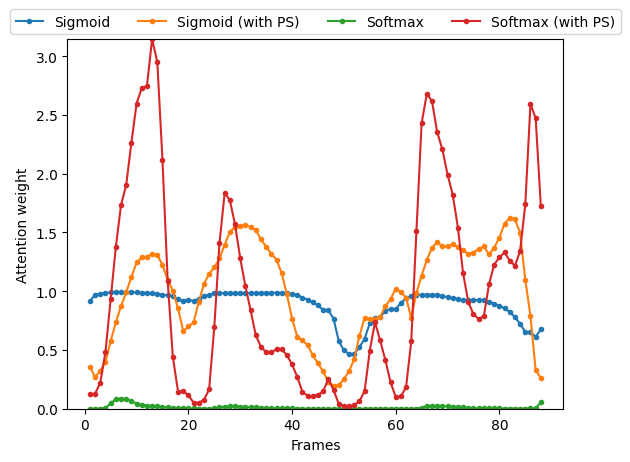

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

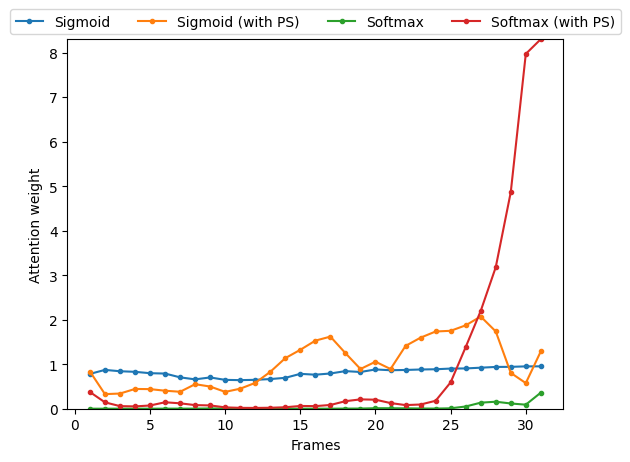

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

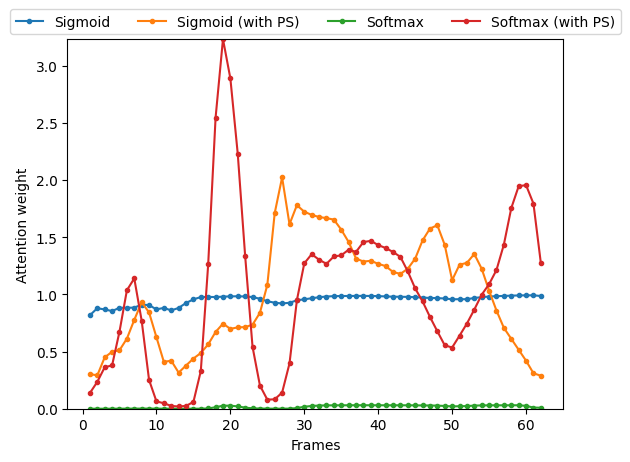

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

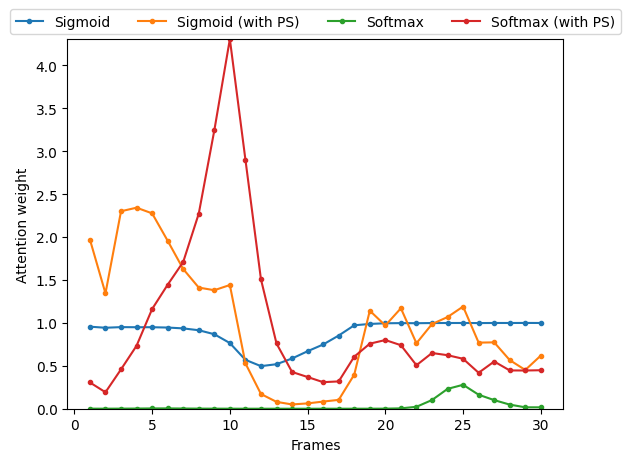

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

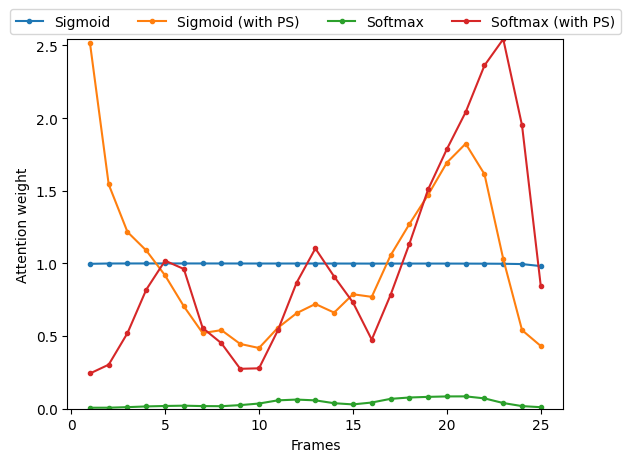

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

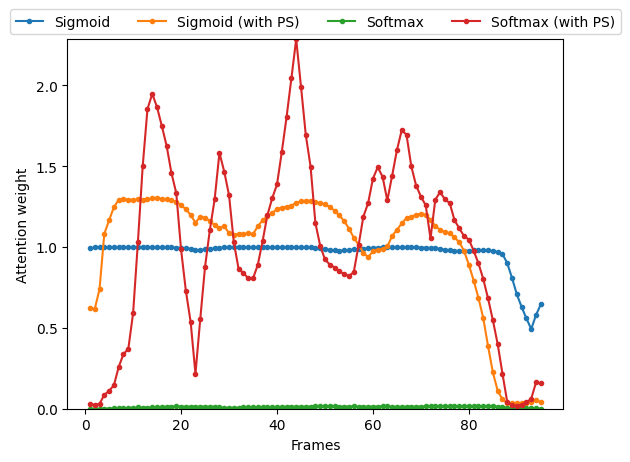

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

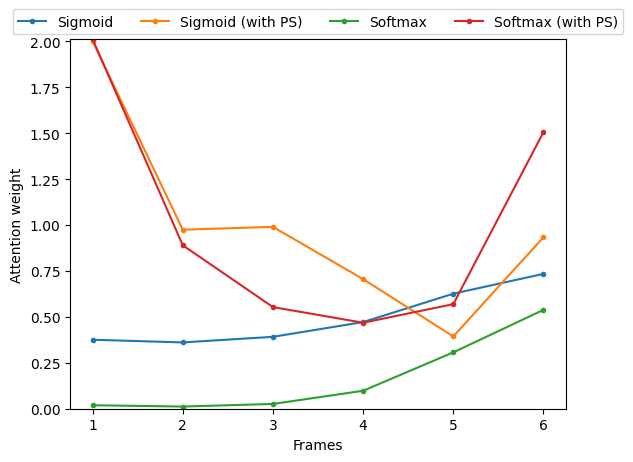

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

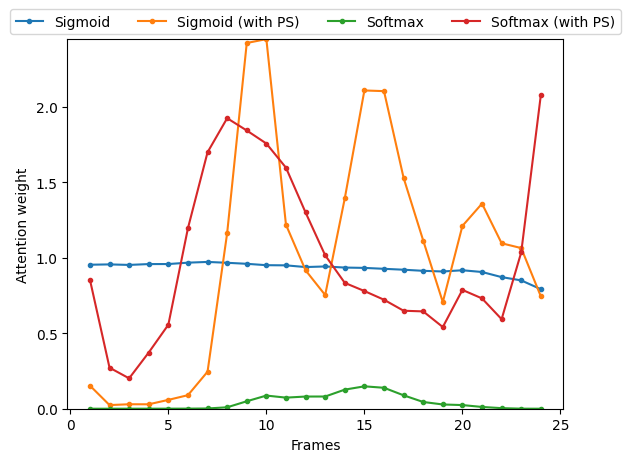

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

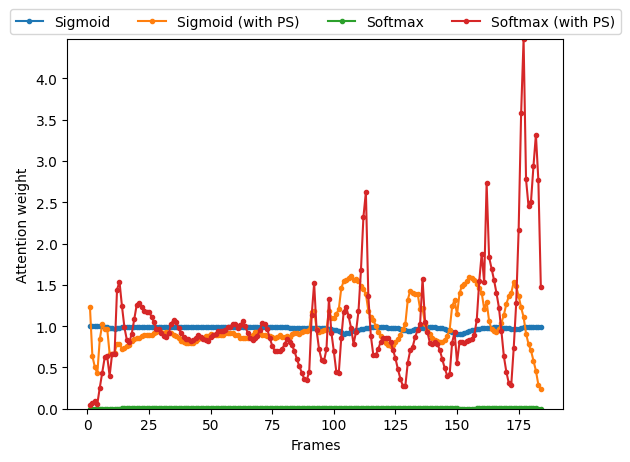

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

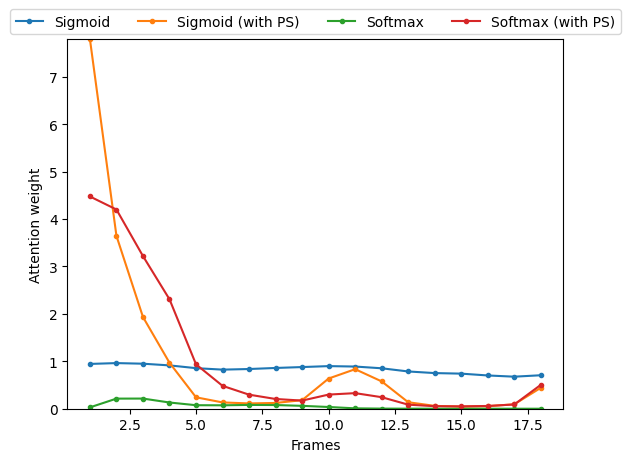

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

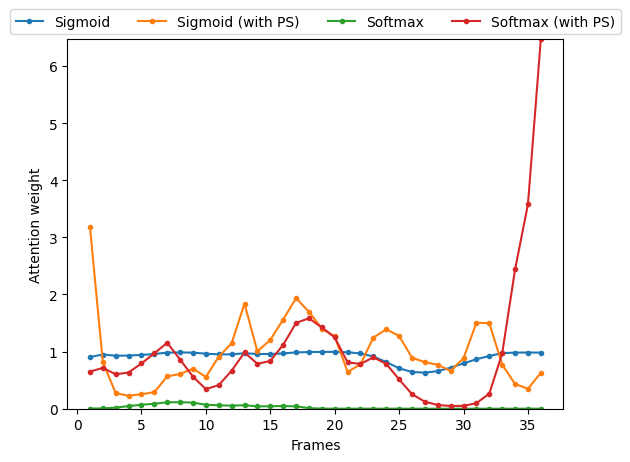

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

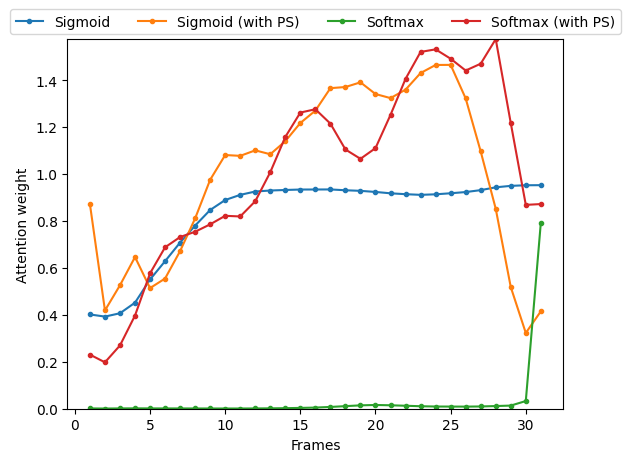

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

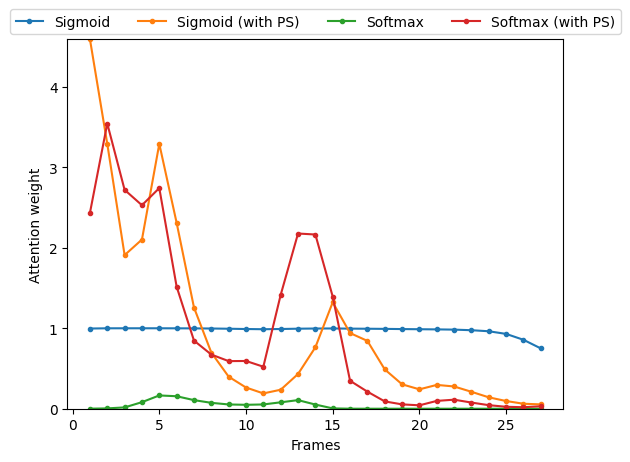

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

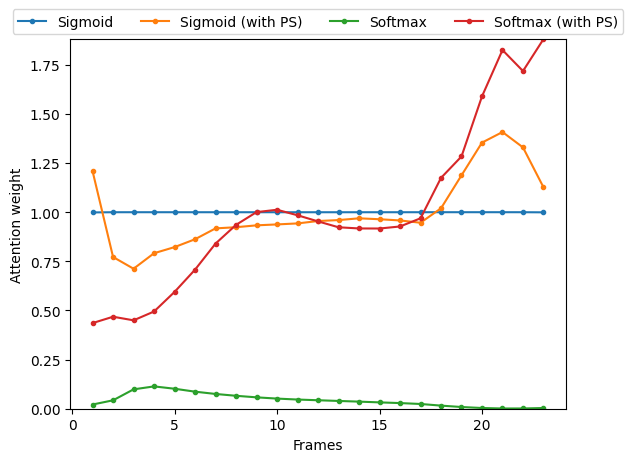

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

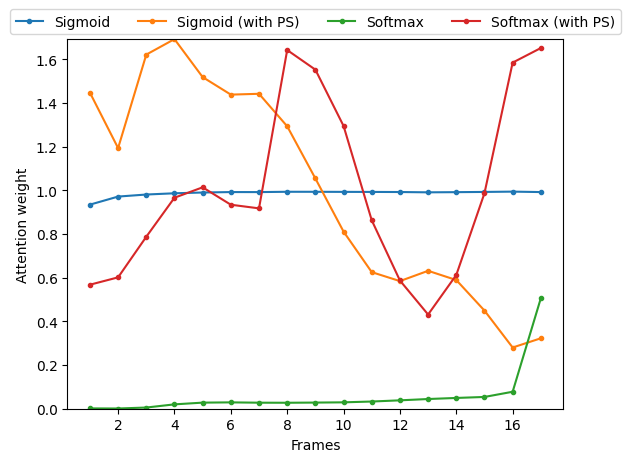

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)

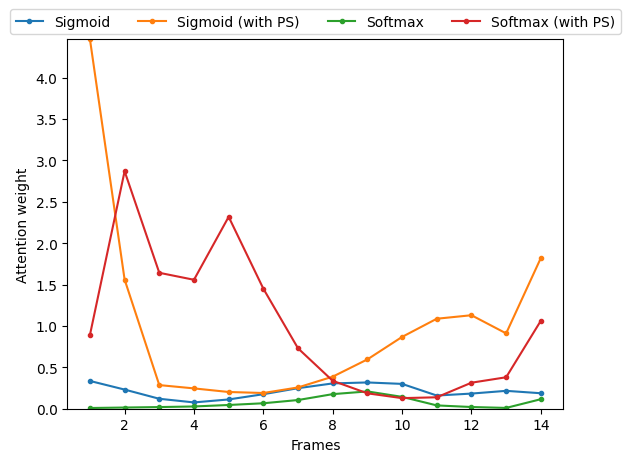

In [ ]:
data = next(test_iter)
feature = data["feature"]

logit_sig_wops = model_sig_wops(copy.deepcopy(feature).to(device))
attw_sig_wops = model_sig_wops.attw.detach().cpu().numpy()
attw_sig_wops = attw_sig_wops.reshape([-1])

logit_sig_wps = model_sig_wps(copy.deepcopy(feature).to(device))
attw_sig_wps = model_sig_wps.attw.detach().cpu().numpy()
attw_sig_wps = attw_sig_wps.reshape([-1])

logit_smax_wops = model_smax_wops(copy.deepcopy(feature).to(device))
attw_smax_wops = model_smax_wops.attw.detach().cpu().numpy()
attw_smax_wops = attw_smax_wops.reshape([-1])

logit_smax_wps = model_smax_wps(copy.deepcopy(feature).to(device))
attw_smax_wps = model_smax_wps.attw.detach().cpu().numpy()
attw_smax_wps = attw_smax_wps.reshape([-1])

params = {
    "attws": [
        attw_sig_wops,
        attw_sig_wps,
        attw_smax_wops,
        attw_smax_wps],
    "names": [
        "Sigmoid",
        "Sigmoid (with PS)",
        "Softmax",
        "Softmax (with PS)"]}

plot_attention(params)